# Camera Calibration

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pickle

In [2]:
#Open images from the camera_cal folder

n_img = 20
images = list()
for img_num in range(n_img):
    images.append(mpimg.imread('./camera_cal/calibration'+str(img_num+1)+'.jpg'))


#Store object and image points folling 

obj_points = list()
img_points = list()
images_used = list()


img_idx=1
for img in images:

    #object points
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)


    #Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


    #Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    if ret == True:
        images_used.append(img_idx)
        img_points.append(corners)
        obj_points.append(objp)
        
    img_idx = img_idx + 1

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1],None,None)


print ('Images used in calibration', images_used)

Images used in calibration [2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [3]:
pickle_out = (ret,mtx,dist,rvecs,tvecs)
pickle.dump(pickle_out, open( "camera_cal.p", "wb" ) )

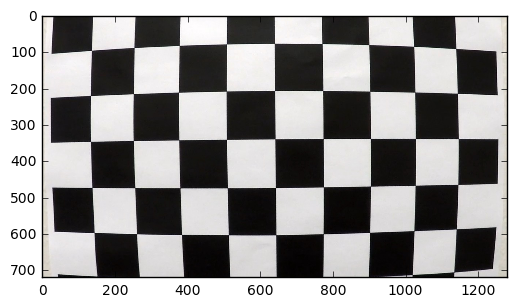

In [4]:
#Test calibration: Original Image

test_img = images[0]
# test_img = mpimg.imread('./test_images/test4.jpg')


plt.imshow(test_img)

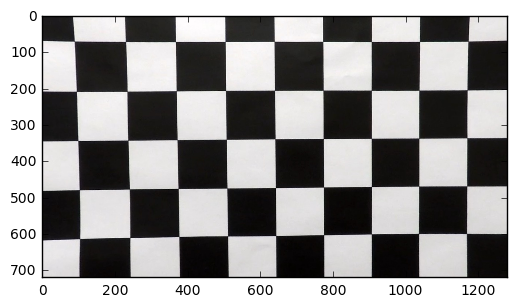

In [5]:
#Test calibration: Undistored Image
dst = cv2.undistort(test_img, mtx, dist, None, mtx)
plt.imshow(dst)

Is test4.jpg properly undistored? It is hard to tell. Undistortion becomes more obvious when used on the close up calibration images